In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.models import Model, load_model  
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, add, Concatenate, RepeatVector, Bidirectional, Flatten, Multiply, Lambda
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers
from keras import backend as K
from keras.utils.vis_utils import plot_model
from IPython.display import Image, display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CSV dataset
dataset = pd.read_csv('/content/drive/MyDrive/data1.csv')
dataset.head(5)

,Unnamed: 0,image_id,mesh,Image_path,report
0,0,CXR3695_IM-1845-1001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq mild central vascular prominence cong...
1,1,CXR3695_IM-1845-2001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq mild central vascular prominence cong...
2,2,CXR3703_IM-1850-1001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no evidence acute cardiopulmonary pro...
3,3,CXR3703_IM-1850-2001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no evidence acute cardiopulmonary pro...
4,4,CXR3686_IM-1837-0001-0001.png,Cardiomegaly Airspace Disease/lung/base/right ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq stable cardiomegaly . improved aerat...


In [ ]:
#dataset.drop(['Unnamed: 0.1'], inplace=True , axis=1)

In [ ]:
dataset.drop(['Unnamed: 0'], inplace=True , axis=1)

In [ ]:
dataset.head(5)

,image_id,mesh,Image_path,report
0,CXR3695_IM-1845-1001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq mild central vascular prominence cong...
1,CXR3695_IM-1845-2001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq mild central vascular prominence cong...
2,CXR3703_IM-1850-1001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no evidence acute cardiopulmonary pro...
3,CXR3703_IM-1850-2001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no evidence acute cardiopulmonary pro...
4,CXR3686_IM-1837-0001-0001.png,Cardiomegaly Airspace Disease/lung/base/right ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq stable cardiomegaly . improved aerat...


In [ ]:
dataset.shape

(7430, 4)

In [ ]:
dataset.info

<bound method DataFrame.info of                            image_id  \
0          CXR3695_IM-1845-1001.png   
1          CXR3695_IM-1845-2001.png   
2          CXR3703_IM-1850-1001.png   
3          CXR3703_IM-1850-2001.png   
4     CXR3686_IM-1837-0001-0001.png   
...                             ...   
7425       CXR1842_IM-0545-1002.png   
7426       CXR1863_IM-0558-1001.png   
7427       CXR1863_IM-0558-3001.png   
7428        CXR186_IM-0558-1001.png   
7429        CXR186_IM-0558-2001.png   

                                                   mesh  \
0                             Pulmonary Congestion/mild   
1                             Pulmonary Congestion/mild   
2                                                normal   
3                                                normal   
4     Cardiomegaly Airspace Disease/lung/base/right ...   
...                                                 ...   
7425  Nodule/lung/middle lobe/right Calcinosis/lung/...   
7426  Cardiomegaly/mild Aor

In [ ]:
df = dataset.drop_duplicates(subset=["report"], keep="first"). reset_index(drop=True)
df

,image_id,mesh,Image_path,report
0,CXR3695_IM-1845-1001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq mild central vascular prominence cong...
1,CXR3703_IM-1850-1001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no evidence acute cardiopulmonary pro...
2,CXR3686_IM-1837-0001-0001.png,Cardiomegaly Airspace Disease/lung/base/right ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq stable cardiomegaly . improved aerat...
3,CXR3677_IM-1830-1001.png,Aorta/tortuous,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no active disease . heart size within...
4,CXR3671_IM-1827-1001.png,Opacity/lung/upper lobe/right/patchy/mild Infi...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq persistent mild right upper lobe infi...
...,...,...,...,...
3033,CXR1883_IM-0572-1001.png,Surgical Instruments/abdomen/right,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no acute active cardiac pulmonary ple...
3034,CXR1889_IM-0577-1001.png,Diaphragm/right/elevated Pulmonary Atelectasis...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq atelectasis the right lung base . el...
3035,CXR1842_IM-0545-1001.png,Nodule/lung/middle lobe/right Calcinosis/lung/...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq heart size normal . lungs clear . s...
3036,CXR1863_IM-0558-1001.png,Cardiomegaly/mild Aorta/tortuous Lung/hypoinfl...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq low volume study without acute proces...


In [ ]:
df = df.sample(frac=1). reset_index(drop=True)
df

,image_id,mesh,Image_path,report
0,CXR3709_IM-1852-1001.png,Mediastinum/prominent Aortic Aneurysm,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq wide mediastinal consistent with hist...
1,CXR661_IM-2238-2002.png,Medical Device/spine Thoracic Vertebrae/degene...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq clear lungs . spinal stimulator lungs...
2,CXR3988_IM-2041-1001.png,Opacity/lung/lingula/streaky Opacity/lung/base...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no acute osseous abnormalities . con...
3,CXR2537_IM-1049-1001.png,Opacity/lung/base/right/patchy Pulmonary Atele...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq right basal acute airspace disease . ...
4,CXR300_IM-1385-1001.png,Lung/hyperdistention/mild Funnel Chest/mild Ca...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq changes chronic lung disease with no ...
...,...,...,...,...
3033,CXR3211_IM-1517-1001-0001.png,Atherosclerosis/aorta Kyphosis Arthritis Pleur...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq probable small bilateral pleural effu...
3034,CXR1085_IM-0059-1001.png,Lung/hypoinflation Opacity/lung/upper lobe/lef...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq low lung volumes without acute cardio...
3035,CXR398_IM-2039-1001.png,Calcinosis/right/paratracheal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no acute findings . please note that...
3036,CXR1593_IM-0385-1001.png,Pleural Effusion/right/moderate Pulmonary Atel...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq moderate right pleural effusion . mod...


In [ ]:
train_data=df.iloc[:500]
train_data

,image_id,mesh,Image_path,report
0,CXR3709_IM-1852-1001.png,Mediastinum/prominent Aortic Aneurysm,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq wide mediastinal consistent with hist...
1,CXR661_IM-2238-2002.png,Medical Device/spine Thoracic Vertebrae/degene...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq clear lungs . spinal stimulator lungs...
2,CXR3988_IM-2041-1001.png,Opacity/lung/lingula/streaky Opacity/lung/base...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no acute osseous abnormalities . con...
3,CXR2537_IM-1049-1001.png,Opacity/lung/base/right/patchy Pulmonary Atele...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq right basal acute airspace disease . ...
4,CXR300_IM-1385-1001.png,Lung/hyperdistention/mild Funnel Chest/mild Ca...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq changes chronic lung disease with no ...
...,...,...,...,...
495,CXR1864_IM-0558-1001.png,Cardiomegaly/borderline Nodule/lung/lower lobe...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq borderline heart size no acute pulmon...
496,CXR535_IM-2142-1001.png,Scoliosis/thoracic vertebrae Scoliosis/lumbar ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq opacity left lung base represents ate...
497,CXR2326_IM-0897-1001.png,Cardiomegaly/mild Diaphragmatic Eventration/right,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq cardiomegaly no acute pulmonary findi...
498,CXR2634_IM-1121-2001.png,Thoracic Vertebrae/degenerative/moderate,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no acute cardiopulmonary disease . lu...


In [ ]:
# Define the image directory and image size
#img_dir = 'images/'
img_size = (224, 224)

# Define the maximum number of words in the vocabulary
max_words = 10000

# Define the maximum length of a caption (including the start and end tokens)
max_len = 100

In [ ]:
# Split the dataset into training and testing sets
# train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
test_data=df.iloc[501:600]

In [ ]:
#Define the tokenizer and fit it to the training data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['report'].values)

In [ ]:
# Convert the text to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_data['report'].values)
test_sequences = tokenizer.texts_to_sequences(test_data['report'].values)

In [ ]:
# Pad the sequences to the maximum length
train_sequences_pad = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences_pad = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
# train_sequences_pad = train_sequences_pad.flatten()

In [ ]:
train_sequences_pad

array([[  5, 690,  28, ...,   0,   0,   0],
       [  5,  22,  15, ...,   0,   0,   0],
       [  5,   2,   9, ...,   0,   0,   0],
       ...,
       [  5,  59,   2, ...,   0,   0,   0],
       [  5,   2,   9, ...,   0,   0,   0],
       [  5,   2,   9, ...,   0,   0,   0]], dtype=int32)

In [ ]:
# Define the vocabulary size 
# and the start and end tokens
vocab_size = len(tokenizer.word_index) + 1
# start_token = '<start>'
# end_token = '<end>'


In [ ]:
#Define the input and output data for the model
train_images = []
train_captions = []
for i in range(train_data.shape[0]):
    img_path = train_data['Image_path'].iloc[i]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    train_images.append(img_arr)
    caption = train_data['report'].iloc[i]
    train_captions.append(caption)
train_images = np.array(train_images)
train_captions = np.array(train_captions)


In [ ]:
train_images

array([[[[ 10.,  10.,  10.],
         [  6.,   6.,   6.],
         [  6.,   6.,   6.],
         ...,
         [ 10.,  10.,  10.],
         [  2.,   2.,   2.],
         [  3.,   3.,   3.]],

        [[  8.,   8.,   8.],
         [  9.,   9.,   9.],
         [ 12.,  12.,  12.],
         ...,
         [207., 207., 207.],
         [ 24.,  24.,  24.],
         [ 12.,  12.,  12.]],

        [[ 13.,  13.,  13.],
         [ 21.,  21.,  21.],
         [ 23.,  23.,  23.],
         ...,
         [169., 169., 169.],
         [201., 201., 201.],
         [ 16.,  16.,  16.]],

        ...,

        [[ 51.,  51.,  51.],
         [ 49.,  49.,  49.],
         [ 49.,  49.,  49.],
         ...,
         [ 47.,  47.,  47.],
         [ 44.,  44.,  44.],
         [ 46.,  46.,  46.]],

        [[ 51.,  51.,  51.],
         [ 51.,  51.,  51.],
         [ 51.,  51.,  51.],
         ...,
         [ 46.,  46.,  46.],
         [ 45.,  45.,  45.],
         [ 46.,  46.,  46.]],

        [[ 54.,  54.,  54.],
       

In [ ]:
train_images.shape
# array
# tensor
# list

(500, 224, 224, 3)

In [ ]:
train_data['img_array'].shape

(500,)

In [ ]:
# train_images = np.array(train_images)
# reshaped_train_images = train_images.reshape(train_images.shape[0], 224, 224, 3)
# train_data['img_array'] = tf.convert_to_tensor(reshaped_train_images)

In [ ]:
# train_data.loc[:, 'img_array'] = train_images.tolist()

<ipython-input-23-221af9f6f678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'img_array'] = train_images.tolist()


In [ ]:
train_images = tf.convert_to_tensor(train_images)

In [ ]:
# train_data['caption']=train_captions

<ipython-input-52-189069772e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['caption']=train_captions


In [ ]:
train_data.drop(['caption'], inplace=True , axis=1)

<ipython-input-54-7cccf2843600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['caption'], inplace=True , axis=1)


In [ ]:
train_data.head(5)

,image_id,mesh,Image_path,report
0,CXR3709_IM-1852-1001.png,Mediastinum/prominent Aortic Aneurysm,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq wide mediastinal consistent with hist...
1,CXR661_IM-2238-2002.png,Medical Device/spine Thoracic Vertebrae/degene...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq clear lungs . spinal stimulator lungs...
2,CXR3988_IM-2041-1001.png,Opacity/lung/lingula/streaky Opacity/lung/base...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no acute osseous abnormalities . con...
3,CXR2537_IM-1049-1001.png,Opacity/lung/base/right/patchy Pulmonary Atele...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq right basal acute airspace disease . ...
4,CXR300_IM-1385-1001.png,Lung/hyperdistention/mild Funnel Chest/mild Ca...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq changes chronic lung disease with no ...


In [ ]:
path = '/content/drive/My Drive/train_data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  train_data.to_csv(f)

In [ ]:
train_data.shape

(500, 5)

In [ ]:
# train_images_path = train_data['Image_path'].values
# train_captions = train_data['report'].values

# def image_generator(image_paths, batch_size):
#     i = 0
#     while True:
#         batch_images = []
#         for j in range(batch_size):
#             img_path = image_paths[(i*batch_size + j) % len(image_paths)]
#             img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
#             img_arr = tf.keras.preprocessing.image.img_to_array(img)
#             batch_images.append(img_arr)
#         i += 1
#         yield np.array(batch_images)
        
# train_steps = int(np.ceil(len(train_images_path) / batch_size))

# train_image_gen = image_generator(train_images_path, batch_size)
# train_caption_gen = caption_generator(train_captions, batch_size)

In [ ]:
# def caption_generator(captions, batch_size):
#     i = 0
#     while True:
#         batch_captions = []
#         for j in range(batch_size):
#             caption = captions[(i*batch_size + j) % len(captions)]
#             batch_captions.append(caption)
#         i += 1
#         yield np.array(batch_captions)

In [ ]:
# x=next(train_image_gen)
# x

In [ ]:
# x[0][0]

array([[16., 16., 16.],
       [13., 13., 13.],
       [13., 13., 13.],
       [13., 13., 13.],
       [13., 13., 13.],
       [12., 12., 12.],
       [ 9.,  9.,  9.],
       [ 9.,  9.,  9.],
       [ 9.,  9.,  9.],
       [10., 10., 10.],
       [10., 10., 10.],
       [ 9.,  9.,  9.],
       [ 8.,  8.,  8.],
       [10., 10., 10.],
       [12., 12., 12.],
       [15., 15., 15.],
       [16., 16., 16.],
       [18., 18., 18.],
       [13., 13., 13.],
       [16., 16., 16.],
       [16., 16., 16.],
       [14., 14., 14.],
       [16., 16., 16.],
       [15., 15., 15.],
       [12., 12., 12.],
       [15., 15., 15.],
       [16., 16., 16.],
       [19., 19., 19.],
       [23., 23., 23.],
       [19., 19., 19.],
       [13., 13., 13.],
       [12., 12., 12.],
       [13., 13., 13.],
       [14., 14., 14.],
       [14., 14., 14.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 4.,  4.,  4.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 6.,  6.,  6.],
       [ 2.,  2.

In [ ]:
test_images = []
test_captions = []
for i in range(len(test_data)):
    img_path = test_data['Image_path'].iloc[i]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    test_images.append(img_arr)
    caption = test_data['report'].iloc[i]
    test_captions.append(caption)
test_images = np.array(test_images)
test_captions = np.array(test_captions)

In [ ]:
# test_data.loc[:, 'img_array'] = test_images.tolist()
test_images = tf.convert_to_tensor(test_images)

In [ ]:
test_data.head(5)

,image_id,mesh,Image_path,report,img_array
501,CXR3984_IM-2040-1001.png,"Aorta, Thoracic/tortuous Calcinosis/lung/hilum...",/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq stable tortuosity the thoracic aorta ...,"[[[2.0, 2.0, 2.0], [3.0, 3.0, 3.0], [3.0, 3.0,..."
502,CXR1031_IM-0025-4004.png,"Cardiomegaly/mild Catheters, Indwelling/right ...",/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq heart size mildly enlarged for techni...,"[[[2.0, 2.0, 2.0], [2.0, 2.0, 2.0], [2.0, 2.0,..."
503,CXR1130_IM-0087-1001.png,Calcified Granuloma/lung/base/right Opacity/lu...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq illdefined oblong opacity the lateral...,"[[[152.0, 152.0, 152.0], [154.0, 154.0, 154.0]..."
504,CXR2302_IM-0882-1001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq no acute cardiopulmonary process spec...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
505,CXR2550_IM-1058-1001.png,No Indexing,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,startseq compared with prior eamination mildly...,"[[[153.0, 153.0, 153.0], [149.0, 149.0, 149.0]..."


In [ ]:
# test_images_path = test_data['Image_path'].values
# test_captions = test_data['report'].values

# def test_image_generator(image_paths, batch_size):
#     i = 0
#     while True:
#         batch_images = []
#         for j in range(batch_size):
#             img_path = image_paths[(i*batch_size + j) % len(image_paths)]
#             img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
#             img_arr = tf.keras.preprocessing.image.img_to_array(img)
#             batch_images.append(img_arr)
#         i += 1
#         yield np.array(batch_images)

# def test_caption_generator(captions, batch_size):
#     i = 0
#     while True:
#         batch_captions = []
#         for j in range(batch_size):
#             caption = captions[(i*batch_size + j) % len(captions)]
#             batch_captions.append(caption)
#         i += 1
#         yield np.array(batch_captions)

# batch_size = 32
# test_steps = int(np.ceil(len(test_images_path) / batch_size))

# test_image_gen = test_image_generator(test_images_path, batch_size)
# test_caption_gen = test_caption_generator(test_captions, batch_size)


In [ ]:
path = '/content/drive/My Drive/test_data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  test_data.to_csv(f)

In [ ]:
# Define the embedding size and the LSTM size
embedding_size = 300
lstm_size = 256

# Define the input for the image and the caption
image_input = Input(shape=(img_size[0], img_size[1], 3))
caption_input = Input(shape=(max_len,))

In [ ]:
caption_input.shape

TensorShape([None, 100])

In [ ]:
# Define the CNN model for image feature extraction
cnn_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(img_size[0], img_size[1], 3))
cnn_model.trainable = False
image_features = cnn_model(image_input)
image_features = Flatten()(image_features)
image_features = Dense(embedding_size, activation='relu')(image_features)
image_features = RepeatVector(max_len)(image_features)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
image_features.shape

TensorShape([None, 100, 300])

In [ ]:
# Define the LSTM model for caption generation
caption_features = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len)(caption_input)
caption_lstm = LSTM(units=lstm_size, return_sequences=True)(caption_features)
caption_features = Dense(300)(caption_lstm)

In [ ]:
caption_features.shape

TensorShape([None, 100, 300])

In [ ]:
from keras.layers import Permute, Reshape

In [ ]:
# #Define the attention mechanism
# attention = Multiply()([image_features, caption_features])
# attention = Lambda(lambda x: K.sum(x, axis=2))(attention)
# attention = Activation('softmax')(attention)
# attention = RepeatVector(lstm_size*2)(attention)
# attention = Permute([2, 1])(attention)
# attention = Dense(lstm_size*2, activation='tanh')(attention)

# Define the attention mechanism v2
attention = Multiply()([image_features, caption_features])
attention = Permute((2, 1))(attention)
attention = Dense(max_len, activation='softmax')(attention)
attention = Permute((2, 1))(attention)
# attention = Lambda(lambda x: K.expand_dims(x))(attention)
# attention = Reshape((max_len,1,1))(attention,1)

In [ ]:
attention.shape

TensorShape([None, 100, 300])

In [ ]:
# # Combine the image features and the caption features using the attention mechanism
# context = Multiply()([caption_features, attention])
# context = Lambda(lambda x: K.sum(x, axis=1))(context)
# context = Concatenate()([context, image_features])

# # Combine the image features and the caption features using the attention mechanism v2
# context = Multiply()([attention, caption_features])
# # context = Lambda(lambda x: K.sum(x, axis=1))(context)
# context = Concatenate()([context, image_features])

In [ ]:
# context=0

In [ ]:
context = Multiply()([attention, caption_features])
# context = Lambda(lambda x: K.sum(x, axis=1))(context)
context.shape

TensorShape([None, 100, 300])

In [ ]:
# output=0

In [ ]:
# Generate the output caption
output = Dense(units=vocab_size)(context)
output.shape

TensorShape([None, 100, 1112])

In [ ]:
# output = Lambda(lambda x: K.expand_dims(x))(attention)
#output.shape

In [ ]:
# output = Reshape((1, vocab_size))(output)
# output = Lambda(lambda x: K.expand_dims(x, axis=-1))(output)
# output = Lambda(lambda x: K.squeeze(x, axis=-1))(output)
# output.shape

TensorShape([None, 1, 1083])

In [ ]:
output = Activation('softmax')(output)
output.shape

TensorShape([None, 100, 1112])

In [ ]:
# Define the model and compile it
model = Model(inputs=[image_input, caption_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Define the checkpoint and early stopping callbacks
checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

In [ ]:
train_sequences_pad.shape

(500, 100)

In [ ]:
train_data['report'].shape

(500,)

In [ ]:
train_images.shape

TensorShape([500, 224, 224, 3])

In [ ]:
b=to_categorical(train_sequences_pad, num_classes=vocab_size)

In [ ]:
b.shape

(500, 100, 1112)

In [ ]:

# #generator for y in batches so it has the same array length as the other inputs
# def generate_y(train_sequences, vocab_size, batch_size=32):
#     num_batches = len(train_sequences) // batch_size
#     while True:
#         for i in range(num_batches):
#             batch_sequences = train_sequences[i*batch_size:(i+1)*batch_size]
#             batch_y = to_categorical(batch_sequences, num_classes=vocab_size)
#             yield batch_y

# train_sequences_gen = generate_y(train_sequences, vocab_size)

In [ ]:
# next(train_sequences_gen).shape

In [ ]:
# next(train_image_gen).shape

In [ ]:
test_images.shape

TensorShape([99, 224, 224, 3])

In [ ]:
c=to_categorical(test_sequences_pad, num_classes=vocab_size)

In [ ]:
c.shape

(99, 100, 1112)

In [ ]:
# Train the model
history = model.fit(
    x=[train_images,
    train_sequences_pad],
    y=b,
    batch_size=32, epochs=50,
    callbacks=[checkpoint, early_stopping],
    validation_data=([test_images, test_sequences_pad],c )
    )

# Save the model
model.save('model.h5')

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 6.9273
Epoch 1: val_loss improved from inf to 6.65949, saving model to model_weights.h5
16/16 [==============================] - 29s 709ms/step - loss: 6.9273 - val_loss: 6.6595
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 6.2374
Epoch 2: val_loss improved from 6.65949 to 5.56881, saving model to model_weights.h5
16/16 [==============================] - 7s 442ms/step - loss: 6.2374 - val_loss: 5.5688
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 4.8742
Epoch 3: val_loss improved from 5.56881 to 3.86191, saving model to model_weights.h5
16/16 [==============================] - 6s 373ms/step - loss: 4.8742 - val_loss: 3.8619
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 3.2566
Epoch 4: val_loss improved from 3.86191 to 2.50982, saving model to model_weights.h5
16/16 [==============================] - 5s 354ms/step - loss: 3.2566 - val_loss: 2.5098
Epoch 5

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Get the number of epochs
num_epochs = len(train_loss)

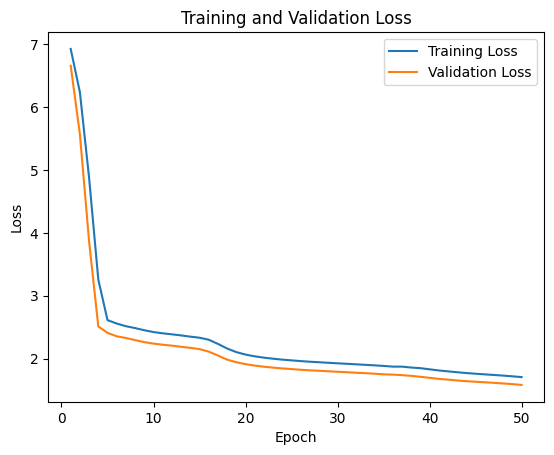

In [ ]:
# Plot the training and validation loss curves
plt.plot(range(1, num_epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import nltk
from nltk.translate.bleu_score import corpus_bleu

In [ ]:
# Generate captions for test images using the trained model
predicted_sequences = model.predict([test_images, test_sequences_pad])
predicted_sequences = np.argmax(predicted_sequences, axis=2)

4/4 [==============================] - 2s 71ms/step


In [ ]:
test_sequences_pad[2]

array([ 5,  2,  9, 24, 66,  2, 16, 26, 29,  2, 11, 46, 10, 12, 13, 14,  7,
       19, 69,  3, 20,  4, 23, 74, 61,  3, 95, 76,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [ ]:
predicted_sequences[2]

array([5, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Convert sequences to text
predicted_captions = []
for sequence in predicted_sequences:
    caption = []
    for idx in sequence:
        if idx == 0:
            continue
        word = tokenizer.sequences_to_texts([sequence])[0]
        if word == '':
            continue
        if word == '<end>':
            break
        caption.append(word)
    predicted_captions.append(' '.join(caption))

In [ ]:
# predicted_captions = []
# for sequence in predicted_sequences:
#   caption = []
#   if sequence.all == 0:
#       continue
#   word = tokenizer.sequences_to_texts([[sequence]])[0]
#   if word == '':
#       continue
#   caption.append(word)
# predicted_captions = ' '.join(caption)


In [ ]:
# Convert sequences to text
actual_captions = []
for sequence in test_sequences:
    caption = []
    for idx in sequence:
        if idx == 0:
            continue
        word = tokenizer.sequences_to_texts([sequence])[0]
        if word == '':
            continue
        if word == '<end>':
            break
        caption.append(word)
    actual_captions.append(' '.join(caption))

In [ ]:
actual_captions[2]

[['startseq',
  'no',
  'acute',
  'cardiopulmonary',
  'process',
  'no',
  'focal',
  'lung',
  'consolidation',
  'no',
  'pneumothora',
  'large',
  'pleural',
  'effusion',
  'heart',
  'size',
  'and',
  'pulmonary',
  'vascularity',
  'are',
  'within',
  'normal',
  'limits',
  'osseous',
  'structures',
  'are',
  'grossly',
  'intact',
  'endseq',
  'startseq',
  'no',
  'acute',
  'cardiopulmonary',
  'process',
  'no',
  'focal',
  'lung',
  'consolidation',
  'no',
  'pneumothora',
  'large',
  'pleural',
  'effusion',
  'heart',
  'size',
  'and',
  'pulmonary',
  'vascularity',
  'are',
  'within',
  'normal',
  'limits',
  'osseous',
  'structures',
  'are',
  'grossly',
  'intact',
  'endseq',
  'startseq',
  'no',
  'acute',
  'cardiopulmonary',
  'process',
  'no',
  'focal',
  'lung',
  'consolidation',
  'no',
  'pneumothora',
  'large',
  'pleural',
  'effusion',
  'heart',
  'size',
  'and',
  'pulmonary',
  'vascularity',
  'are',
  'within',
  'normal',
  'limi

In [ ]:
# Compute the BLEU score
actual_captions = [[caption.split()] for caption in actual_captions]
predicted_captions = [caption.split() for caption in predicted_captions]
bleu_score = corpus_bleu(actual_captions, predicted_captions)
print('BLEU Score:', bleu_score)


BLEU Score: 1.6540933719033113e-155


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
